In [68]:
import pandas as pd

In [69]:
df = pd.read_csv('housepricedata.csv')
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [70]:
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [71]:
X = dataset[:,0:10]
Y = dataset[:,10]

In [72]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [73]:
from sklearn.model_selection import train_test_split as tts

X_train, X_val_and_test, Y_train, Y_val_and_test = tts(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = tts(X_val_and_test, Y_val_and_test, test_size=0.5)

print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [74]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [75]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [76]:
history_data = model.fit(X_train, Y_train,
                  batch_size=32, epochs=100,
                  validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6921 - accuracy: 0.5006 - val_loss: 0.6873 - val_accuracy: 0.4886
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6828 - accuracy: 0.5382 - val_loss: 0.6820 - val_accuracy: 0.4977
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6768 - accuracy: 0.5400 - val_loss: 0.6768 - val_accuracy: 0.4977
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6754 - accuracy: 0.5177 - val_loss: 0.6718 - val_accuracy: 0.5068
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6715 - accuracy: 0.5322 - val_loss: 0.6666 - val_accuracy: 0.5251
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6670 - accuracy: 0.5439 - val_loss: 0.6611 - val_accuracy: 0.5571
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6607 - accuracy: 0.5820 - val_loss: 0.6558 - val_accuracy: 0.5936
Epoch 8/100
3

Epoch 59/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2608 - accuracy: 0.8988 - val_loss: 0.2583 - val_accuracy: 0.8767
Epoch 60/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2975 - accuracy: 0.8705 - val_loss: 0.2552 - val_accuracy: 0.8858
Epoch 61/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2585 - accuracy: 0.8961 - val_loss: 0.2496 - val_accuracy: 0.8995
Epoch 62/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2770 - accuracy: 0.8823 - val_loss: 0.2511 - val_accuracy: 0.8904
Epoch 63/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2535 - accuracy: 0.8975 - val_loss: 0.2480 - val_accuracy: 0.8995
Epoch 64/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2649 - accuracy: 0.8887 - val_loss: 0.2505 - val_accuracy: 0.8904
Epoch 65/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2875 - accuracy: 0.8851 - val_loss: 0.2548 - val_accuracy: 0.8813
Epoch 

In [77]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.3149 - accuracy: 0.9041


0.9041095972061157

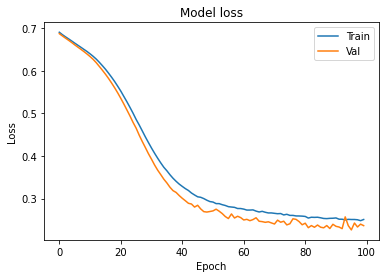

In [79]:
import matplotlib.pyplot as plt

plt.plot(history_data.history['loss'])
plt.plot(history_data.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

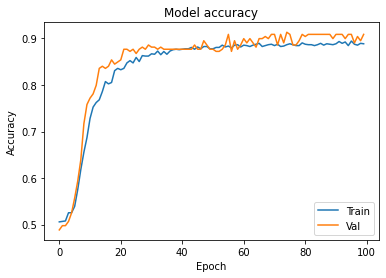

In [83]:
plt.plot(history_data.history['accuracy'])
plt.plot(history_data.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [84]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [85]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [86]:
history_data_2 = model_2.fit(X_train, Y_train,
                  batch_size=32, epochs=100,
                  validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 0.5856 - accuracy: 0.7194 - val_loss: 0.3402 - val_accuracy: 0.8676
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 0.3474 - accuracy: 0.8691 - val_loss: 0.4060 - val_accuracy: 0.8082
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.3476 - accuracy: 0.8486 - val_loss: 0.2712 - val_accuracy: 0.8904
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.2494 - accuracy: 0.9094 - val_loss: 0.2773 - val_accuracy: 0.8813
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.2613 - accuracy: 0.8884 - val_loss: 0.2537 - val_accuracy: 0.9041
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.2604 - accuracy: 0.8907 - val_loss: 0.2380 - val_accuracy: 0.8995
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.2303 - accuracy: 0.9027 - val_loss: 0.3595 - val_accuracy: 0.8721
Epoch 8/100
3

Epoch 59/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1439 - accuracy: 0.9346 - val_loss: 0.3418 - val_accuracy: 0.9315
Epoch 60/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1213 - accuracy: 0.9575 - val_loss: 0.3737 - val_accuracy: 0.9224
Epoch 61/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1665 - accuracy: 0.9345 - val_loss: 0.3632 - val_accuracy: 0.9178
Epoch 62/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1344 - accuracy: 0.9449 - val_loss: 0.3572 - val_accuracy: 0.9178
Epoch 63/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1354 - accuracy: 0.9393 - val_loss: 0.3205 - val_accuracy: 0.9087
Epoch 64/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1574 - accuracy: 0.9306 - val_loss: 0.3557 - val_accuracy: 0.9132
Epoch 65/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1671 - accuracy: 0.9282 - val_loss: 0.3515 - val_accuracy: 0.9224
Epoch 

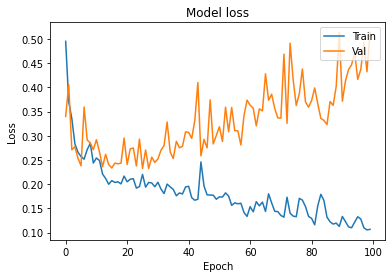

In [87]:
plt.plot(history_data_2.history['loss'])
plt.plot(history_data_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

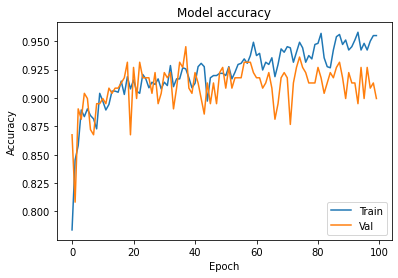

In [89]:
plt.plot(history_data_2.history['accuracy'])
plt.plot(history_data_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [94]:
from keras.layers import Dropout
from keras import regularizers

model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [95]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [96]:
history_data_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 10ms/step - loss: 21.1222 - accuracy: 0.5562 - val_loss: 3.8782 - val_accuracy: 0.7763
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 2.4995 - accuracy: 0.8024 - val_loss: 0.6232 - val_accuracy: 0.8858
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 0.5799 - accuracy: 0.8775 - val_loss: 0.5211 - val_accuracy: 0.8584
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 0.5859 - accuracy: 0.8102 - val_loss: 0.4797 - val_accuracy: 0.8676
Epoch 5/100
32/32 [==============================] - 0s 7ms/step - loss: 0.5017 - accuracy: 0.8738 - val_loss: 0.4730 - val_accuracy: 0.8767
Epoch 6/100
32/32 [==============================] - 0s 7ms/step - loss: 0.4736 - accuracy: 0.8833 - val_loss: 0.4348 - val_accuracy: 0.9178
Epoch 7/100
32/32 [==============================] - 0s 7ms/step - loss: 0.4685 - accuracy: 0.8723 - val_loss: 0.4468 - val_accuracy: 0.9224
Epoch 8/100

Epoch 59/100
32/32 [==============================] - 0s 6ms/step - loss: 0.4512 - accuracy: 0.8901 - val_loss: 0.4124 - val_accuracy: 0.8904
Epoch 60/100
32/32 [==============================] - 0s 6ms/step - loss: 0.4323 - accuracy: 0.8885 - val_loss: 0.3875 - val_accuracy: 0.9087
Epoch 61/100
32/32 [==============================] - 0s 7ms/step - loss: 0.4068 - accuracy: 0.8905 - val_loss: 0.5027 - val_accuracy: 0.8447
Epoch 62/100
32/32 [==============================] - 0s 6ms/step - loss: 0.4405 - accuracy: 0.8872 - val_loss: 0.3962 - val_accuracy: 0.9132
Epoch 63/100
32/32 [==============================] - 0s 7ms/step - loss: 0.4451 - accuracy: 0.8806 - val_loss: 0.3881 - val_accuracy: 0.9132
Epoch 64/100
32/32 [==============================] - 0s 6ms/step - loss: 0.4363 - accuracy: 0.8759 - val_loss: 0.3981 - val_accuracy: 0.9178
Epoch 65/100
32/32 [==============================] - 0s 7ms/step - loss: 0.4299 - accuracy: 0.8757 - val_loss: 0.3866 - val_accuracy: 0.9132
Epoch 

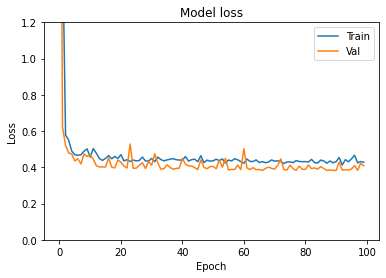

In [97]:
plt.plot(history_data_3.history['loss'])
plt.plot(history_data_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

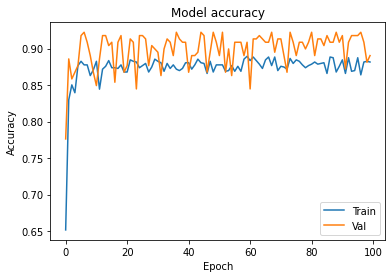

In [98]:
plt.plot(history_data_3.history['accuracy'])
plt.plot(history_data_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()